In [3]:
from src.binance.binance_trader import BinanceTrader
import pandas as pd
import pandas_ta as ta
import hvplot.pandas
import holoviews as hv
from src.processes.Processes_101 import add_returns_targets
import numpy as np
import matplotlib.pyplot as plt

idx = pd.IndexSlice

hv.extension("bokeh")

params = {
    "symbol": "BTCUSDT",
    "interval": "1m",
    "start_dt": "2024-01-01",
    "end_dt": "2024-12-31",
}

trader = BinanceTrader(testnet=False)


ClientError: (400, -1021, "Timestamp for this request was 1000ms ahead of the server's time.", {'Content-Type': 'application/json', 'Content-Length': '88', 'Connection': 'keep-alive', 'Date': 'Fri, 07 Mar 2025 11:55:46 GMT', 'Expires': '0', 'Server': 'nginx', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains', 'X-Frame-Options': 'SAMEORIGIN', 'X-Xss-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'Content-Security-Policy': "default-src 'self'", 'X-Content-Security-Policy': "default-src 'self'", 'X-WebKit-CSP': "default-src 'self'", 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'X-Cache': 'Error from cloudfront', 'Via': '1.1 ac6cb2e46b0930548a2bed2b28c60b52.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'CDG55-P1', 'X-Amz-Cf-Id': 'dOZ5XESibiKAcNFmtHwtGMxMUwqoyY3hL7mdkN92K_Tp4Ywu18EDPg=='}, None)

df = trader.get_candlestick_data_range(**params)

df.to_pickle("./src/data/"+"_".join(params.values()) + ".pkl")

In [4]:
df = pd.read_pickle("./src/data/"+"_".join(params.values()) + ".pkl")
df.drop(columns=["Quote Asset Volume", "Taker Buy Base Asset Volume","Taker Buy Quote Asset Volume"], inplace=True)
df.head(10)
inital_df = df.copy()
df

,Open,High,Low,Close,Volume,Number of Trades
Open Time,,,,,,
2023-12-31 23:00:00,42257.89,42291.10,42196.61,42277.25,114.76075,2898.0
2023-12-31 23:01:00,42277.25,42296.60,42241.10,42252.14,45.96533,1919.0
2023-12-31 23:02:00,42252.15,42297.18,42252.14,42294.04,44.10371,1789.0
2023-12-31 23:03:00,42294.04,42345.64,42294.03,42345.62,45.99365,1408.0
2023-12-31 23:04:00,42345.63,42345.65,42282.00,42282.01,47.50271,1296.0
...,...,...,...,...,...,...
2024-12-30 22:56:00,92948.00,92954.56,92920.10,92945.26,7.34735,1163.0
2024-12-30 22:57:00,92945.25,92945.26,92883.24,92910.44,5.55625,1593.0
2024-12-30 22:58:00,92910.44,92910.44,92795.33,92816.52,7.21662,1978.0


In [5]:
research_df = df.loc[:"2024-06-01"]
research_df

,Open,High,Low,Close,Volume,Number of Trades
Open Time,,,,,,
2023-12-31 23:00:00,42257.89,42291.10,42196.61,42277.25,114.76075,2898.0
2023-12-31 23:01:00,42277.25,42296.60,42241.10,42252.14,45.96533,1919.0
2023-12-31 23:02:00,42252.15,42297.18,42252.14,42294.04,44.10371,1789.0
2023-12-31 23:03:00,42294.04,42345.64,42294.03,42345.62,45.99365,1408.0
2023-12-31 23:04:00,42345.63,42345.65,42282.00,42282.01,47.50271,1296.0
...,...,...,...,...,...,...
2024-06-01 23:55:00,67748.00,67756.00,67747.99,67756.00,2.27067,162.0
2024-06-01 23:56:00,67756.00,67756.00,67755.99,67756.00,1.41115,132.0
2024-06-01 23:57:00,67756.00,67756.00,67755.99,67756.00,2.44119,138.0


Mean. REAL:       0.000002 PERM:       0.000002
Stdd. REAL:       0.000795 PERM:       0.000795
Skew. REAL:      -1.203793 PERM:      -1.227944
Kurt. REAL:      53.153253 PERM:      53.297796


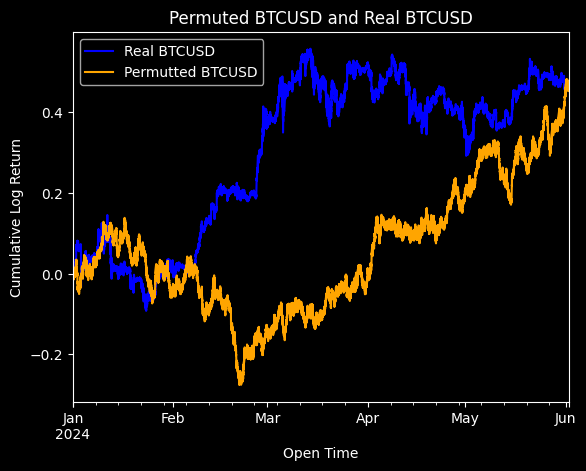

In [7]:
from src.processes.Permutations import bar_permutation

research_df_perm = bar_permutation(research_df)

research_df_r = np.log(research_df['Close']).diff() 
btc_perm_r = np.log(research_df_perm['Close']).diff()

print(f"Mean. REAL: {research_df_r.mean():14.6f} PERM: {btc_perm_r.mean():14.6f}")
print(f"Stdd. REAL: {research_df_r.std():14.6f} PERM: {btc_perm_r.std():14.6f}")
print(f"Skew. REAL: {research_df_r.skew():14.6f} PERM: {btc_perm_r.skew():14.6f}")
print(f"Kurt. REAL: {research_df_r.kurt():14.6f} PERM: {btc_perm_r.kurt():14.6f}")




plt.style.use("dark_background")    
np.log(research_df['Close']).diff().cumsum().plot(color='blue', label='Real BTCUSD')

plt.ylabel("Cumulative Log Return")
plt.title("Real BTCUSD")
plt.legend()

np.log(research_df_perm['Close']).diff().cumsum().plot(color='orange', label='Permutted BTCUSD')
plt.title("Permuted BTCUSD and Real BTCUSD")
plt.ylabel("Cumulative Log Return")
plt.legend()
plt.show()



In [9]:
research_df_perm

,Open,High,Low,Close
Open Time,,,,
2023-12-31 23:00:00,42257.890000,42291.100000,42196.610000,42277.250000
2023-12-31 23:01:00,42277.256716,42277.263561,42264.750961,42264.750961
2023-12-31 23:02:00,42264.750961,42277.225218,42248.045948,42277.225218
2023-12-31 23:03:00,42277.231821,42306.417933,42277.225710,42306.417933
2023-12-31 23:04:00,42306.417933,42308.200358,42277.905194,42279.160167
...,...,...,...,...
2024-06-01 23:55:00,67574.652056,67614.520694,67559.147586,67605.225922
2024-06-01 23:56:00,67605.225922,67645.977267,67601.471133,67633.733802
2024-06-01 23:57:00,67633.723066,67747.067568,67623.020391,67700.982600
